In [1]:
import csv
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import itertools
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nltk.download('book')

In [3]:
def sub_hashtags(tweet):
	clean_tweet = re.sub('#[A-Za-z0-9_]+', 'htag', tweet)
	return clean_tweet

In [4]:
def sub_cashtags(tweet):
	clean_tweet = re.sub('\$[A-Za-z0-9_]+', 'ctag', tweet)
	return clean_tweet

In [5]:
def sub_user(tweet):
	clean_tweet = re.sub('@[A-Za-z0-9_]+', 'user', tweet)
	return clean_tweet

In [6]:
def sub_urls(tweet):
	clean_tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'url', tweet)
	return clean_tweet

In [7]:
def delete_punctuation(tweet):
	clean_tweet = re.compile('[%s]' % re.escape(string.punctuation)).sub('', tweet)
	return clean_tweet

In [8]:
def sub_numbers(tweet):
	clean_tweet = re.sub('[0-9_]+', 'xyz', tweet)
	return clean_tweet

In [9]:
def sub_repeated_chars(tweet):
	clean_tweet = re.sub(r'(.)\1{2,}', r'\1', tweet)
	return clean_tweet

In [10]:
def pre_process_pipeline(tweets):
	clean_tweets = []

	# limpiamos todos los tweets

	for tweet in tweets:
		p_tweet = sub_hashtags(tweet)
		p_tweet = sub_cashtags(p_tweet)
		p_tweet = sub_user(p_tweet)
		p_tweet = sub_urls(p_tweet)
		p_tweet = delete_punctuation(p_tweet)
		p_tweet = sub_numbers(p_tweet)
		p_tweet = sub_repeated_chars(p_tweet)
		clean_tweets.append(p_tweet)

	return clean_tweets

In [11]:
def tokenize_tweets(tweets):
	tok_tweets = []

	for tweet in tweets:
		tok_tweets.append(word_tokenize(tweet))

	return tok_tweets

In [12]:
def lower_case(tweets):
	low_tweets = []

	for tweets in tweets:
		low_tweets.append([j.lower() for j in tweets])

	return low_tweets

In [20]:
def filter_stopwords(tweets, additional_stp = None):

	stop_words = list(stopwords.words('english'))

	stop_words.append('user')
	stop_words.append('htag')
	stop_words.append('ctag')
	stop_words.append('xyz')
	stop_words.append('mail')
	stop_words.append('url')
	stop_words.append('')
	stop_words.append('rt')
	stop_words.append('qt')

	if(additional_stp is not None):
		for item in additional_stp:
			stop_words.append(item)

	filtered_tweet = []

	for tweet in tweets:
		filtered_tweet.append([w for w in tweet if not w in stop_words])

	return filtered_tweet

In [14]:
def stemming(tweets):

	ps = PorterStemmer()

	stem_tweets = []

	for tweet in tweets:
		stem_tweets.append([ps.stem(j) for j in tweet])

	return stem_tweets

In [15]:
def get_wordnet_pos(treebank_tag):

	if treebank_tag.startswith('J'):
		return wn.ADJ
	elif treebank_tag.startswith('V'):
		return wn.VERB
	elif treebank_tag.startswith('N'):
		return wn.NOUN
	elif treebank_tag.startswith('R'):
		return wn.ADV
	else:
		return wn.NOUN

In [16]:
def eng_lemmatizer(tweets):

	wnl = WordNetLemmatizer()

	lem_tweets = []

	for tweet in tweets:
		tags = pos_tag(tweet)
		lem_tweets.append([wnl.lemmatize(j[0],get_wordnet_pos(j[1])) for j in tags])

	return lem_tweets

In [26]:
def process_tweets(file_name):

	tweets = []

	with open(file_name, 'r') as csv_file:
		csv_reader = csv.DictReader(csv_file, delimiter = ';')
		for row in csv_reader:
			tweets.append(row['text'])

	# preprocesamiento de tweets
	prep_tweets = pre_process_pipeline(tweets)

	# procesamiento de tweets - tokenize
	tok_tweets = tokenize_tweets(prep_tweets)

	# procesamiento de tweets - letra minuscula
	low_tweets = lower_case(tok_tweets)

	# procesamiento de tweets - filtado de palabras vacias
	stop_tweets = filter_stopwords(low_tweets, additional_stp=['ukraine', 'russia', 'russian'])

	# procesamiento de tweets - stemming
	stm_tweets = stemming(stop_tweets)

	# se guardan los tweets procesados en un archivo pickle para su uso posterior
	with open('canelo.pickle', 'wb') as f:
		pickle.dump(stm_tweets, f, pickle.HIGHEST_PROTOCOL)

	return stm_tweets

In [27]:
stm_tweets = process_tweets('ukraine.csv')

In [22]:
print(stm_tweets[:5])

[['go', 'start', 'war', 'isnt', 'rhetor', 'west', 'increas', 'tension', 'amp', 'one', 'misplac', 'phrase', 'could', 'trigger', 'conflict', 'send', '🤡'], ['hm', 'may', 'want', 'check', 'biden', 'famili', 'tie', 'ukrain', 'amp', 'china', '’', 'great', 'stori', 'way…jo', '’', 'big', 'guy', 'storylin'], ['bring', 'back', 'militari', 'infrastructur', 'allianc', 'statu', 'quo', 'russianato', 'treati', 'sign'], ['presid', 'putin', 'russian', 'concern', 'basic', 'ignoredw', '’', 'see', 'adequ', 'respons', 'key', 'concern', 'nonexpans', 'nato', 'refus', 'deploy', 'offens', 'weapon', 'next', 'russian', 'border'], ['bombshel', 'key', 'evid', 'undermin', 'ukrain', 'impeach', 'narr', 'withheld', 'trump', 'defens']]


Vamos a realizar una nube de palabras

In [23]:
from wordcloud import WordCloud, STOPWORDS
import itertools
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [24]:
def make_word_cloud(tweets):

	tweet_words = list(itertools.chain.from_iterable(tweets))

	stopwords = set(STOPWORDS)

	wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10)

	wordcloud.generate(' '.join(tweet_words))
 
	# plot the WordCloud image                      
	plt.figure(figsize = (8, 8), facecolor = None)
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.tight_layout(pad = 0)
 
	plt.show()

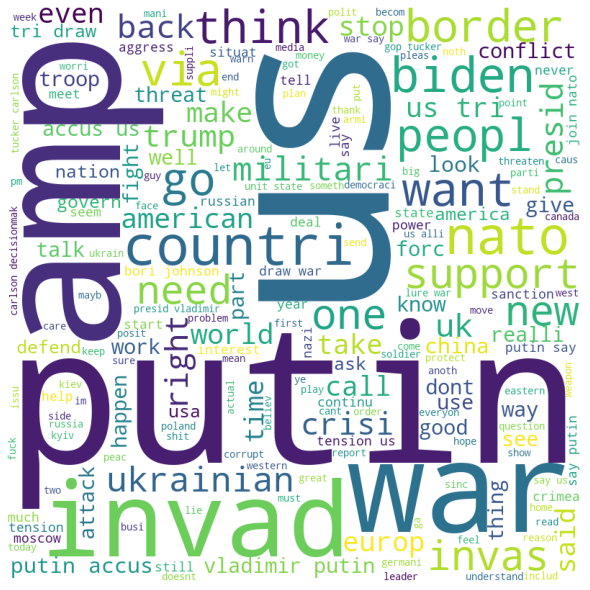

In [28]:
make_word_cloud(stm_tweets)

In [31]:
def make_mask_cloud(tweets):
	
	tweet_words = list(itertools.chain.from_iterable(tweets))

	stopwords = set(STOPWORDS)

	mask = np.array(Image.open("TWITTER2.jpg"))

	wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               stopwords=STOPWORDS.update(['wzy', 'mail', 'url', 'htag', 'covid', 'covid19', 'vacuna', 'si', 'hacer']), contour_width=3, contour_color='steelblue')

	# generate word cloud
	wc.generate(' '.join(tweet_words))

	# store to file
	wc.to_file("file_x.png")

	# show
	plt.imshow(wc, interpolation='bilinear')
	plt.axis("off")
	plt.figure()
	# plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
	# plt.axis("off")
	plt.show()

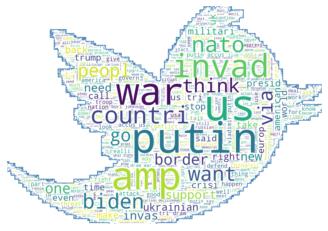

<Figure size 432x288 with 0 Axes>

In [32]:
make_mask_cloud(stm_tweets)

In [33]:
def make_bigrams(tweets):

	bigram_list = []

	# para cada lista de tokens en la lista contenedor
	for item in tweets:
		# creamos los bigramas, regresa una lista con cada uno
		bigram = list(nltk.bigrams(item))

		#los unimos mediante '_'
		bigram_list.append(['_'.join(j) for j in bigram])

	return bigram_list